In [10]:
import pandas as pd
import altair as alt
alt.renderers.set_embed_options(theme='dark')
pd.set_option('display.max_colwidth', None)

# Analysis & Charts

In [11]:
def claim(claim_hash):
    try:
        df_claim = pd.read_json(
            f"https://api.flipsidecrypto.com/api/v2/queries/{claim_hash}/data/latest",
            convert_dates=["BLOCK_TIMESTAMP"],
        )
    except Exception as e:
        print(e)
        return 
    return df_claim

In [12]:
class DataProvider:    
    
    def __init__(self):
        self.lock = '9f7cf9ef-f7eb-45b5-92e2-dccf12d56d05'
        self.exit = '94411e01-3592-47c4-8964-c0611c1ece7a'
        self.pools = {'No LP':'No LP','-1':'No LP','1':'OSMO/ATOM',
                               '604':'STARS/OSMO',
                               '674':'DAI/OSMO',
                               '648':'PSTAKE/OSMO',
                               '3':'AKT/OSMO',
                               '704':'wETH/OSMO',
                               '605':'HUAHUA/OSMO',
                               '678':'USDC/OSMO',
                               '601':'CMDX/OSMO',
                               '560':'UST/OSMO',
                               '561':'LUNA/UST',
                               '562':'LUNA/OSMO',
                               '577':'XKI/OSMO',
                               '690':'MNTL/OSMO'}
    
    def get_lock(self):
        df = claim(self.lock)
        return df
    
    def get_exit(self):
        df = claim(self.exit)
        return df
   

In [13]:
class ChartProvider:    
    
    def __init__(self):
        pass
    
    def chart(self, df, asset, color, text_height=None):
        cols = ['DAY','AMOUNT','TOKEN']
        c1 = alt.Chart(df).mark_line(point=True).encode(
            x=alt.X(cols[0]+':T', axis=alt.Axis(grid=False), sort=alt.EncodingSortField(order='ascending')),
            y=cols[1]+":Q",
            color=alt.Color(cols[2], scale=alt.Scale(domain=[asset], range=[color])),
            tooltip=[alt.Tooltip(cols[0]+':T', format='%Y-%m-%d %H:%M'), alt.Tooltip(cols[1]+":Q")]
        )

        dates_to_mark = pd.DataFrame([['2022-05-09','2022-05-09:06:00','UST Depeg',50000000]],
                                        columns=['Date','text_date','text','height'])
        c2 = alt.Chart(dates_to_mark).mark_text(
                    color='#ef5350',
                    angle=90
                ).encode(
                    x=alt.X('text_date'+':T',axis=alt.Axis(title='')),
                    y=alt.Y('height', axis=alt.Axis(title='Amount swapped')),
                    text='text'
                )
        c3 = alt.Chart(dates_to_mark).mark_rule(color='#ef5350').encode(
            x='Date'+':T'
        )

        return (c1 + c2 + c3).properties(width=700).configure_axisX(
        ).configure_view(strokeOpacity=0)
    
    def assets_chart(self,df,assets,colors, text_height=50000000):
        cols = df.columns
        c1 = alt.Chart(df).mark_line(point=True).encode(
            x=alt.X(cols[0]+':T', axis=alt.Axis(grid=False), sort=alt.EncodingSortField(order='ascending')),
            y=cols[1]+":Q",
            color=alt.Color(cols[2], scale=alt.Scale(domain=assets, range=colors)),
            tooltip=[alt.Tooltip(cols[0]+':T', format='%Y-%m-%d %H:%M'), alt.Tooltip(cols[1]+":Q")]
        )

        dates_to_mark = pd.DataFrame([['2022-05-09','2022-05-09:06:00','UST Depeg',text_height]],
                                        columns=['Date','text_date','text','height'])
        c2 = alt.Chart(dates_to_mark).mark_text(
                    color='#ef5350',
                    angle=90
                ).encode(
                    x=alt.X('text_date'+':T',axis=alt.Axis(title='')),
                    y=alt.Y('height', axis=alt.Axis(title='Amount swapped')),
                    text='text'
                )
        c3 = alt.Chart(dates_to_mark).mark_rule(color='#ef5350').encode(
            x=alt.X('Date'+':T',axis=alt.Axis(title='')),
        )

        return (c1 + c2 + c3).properties(width=700).configure_axisX(
        ).configure_view(strokeOpacity=0)
    
    def users_pie(self, df, title=''):
        cols = df.columns
        dmn = df[cols[1]].unique()
        rng = ['#fbc02c','#ef5350','#25a69a','#ffffff','#322dc2']
        chart = alt.Chart(df, title=title).mark_arc(innerRadius=60).encode(
            theta=alt.Theta(field=cols[0], type="quantitative"),
            color=alt.Color(field=cols[1], type="nominal",
                    scale=alt.Scale(domain=dmn, range=rng),
                    legend=alt.Legend(
                    orient='none',
                    padding=10,
                    legendY=-10,
                    direction='vertical')),
            tooltip=[cols[0], cols[1]]
        ).configure_view(strokeOpacity=0)
        return chart
    
    def lock_pool_pie(self, df, title=''):
        cols = df.columns
        dmn = df[cols[2]].unique()
        rng = ['#ef5350','#fbc02c','#25a69a','#ffffff','#322dc2']
        chart = alt.Chart(df, title=title).mark_arc(innerRadius=60).encode(
            theta=alt.Theta(field=cols[1], type="quantitative"),
            color=alt.Color(field=cols[2], type="nominal",
                    scale=alt.Scale(domain=dmn, range=rng),
                    legend=alt.Legend(
                    orient='none',
                    padding=10,
                    legendY=-10,
                    direction='vertical')),
            tooltip=[cols[1], cols[2]]
        ).configure_view(strokeOpacity=0)
        return chart
    
    def depoolin_users(self,unpooling_users):
        cols = unpooling_users.columns
        c1 = alt.Chart(unpooling_users).mark_line(color='white').encode(
            x=alt.X(cols[0]+':T', axis=alt.Axis(grid=False), sort=alt.EncodingSortField(order='ascending')),
            y=cols[1]+":Q",
            tooltip=[alt.Tooltip(cols[0]+':T', format='%Y-%m-%d %H:%M'), alt.Tooltip(cols[1]+":Q")]
        )
        return c1.configure_view(strokeOpacity=0)
    
    def exit_enter(self, df):
        cols = df.columns
        dmn = list(df.POOL.unique())
        rng = ['#25a69a','#ef5350','#fbc02c',]
        c1 = alt.Chart(df).mark_bar().encode(
            x=alt.X(cols[0]+':T', axis=alt.Axis(grid=False), sort=alt.EncodingSortField(order='ascending')),
            y=cols[1]+":Q",
            color=alt.Color(cols[2], 
                            #scale=alt.Scale(scheme='set2'),
                            scale=alt.Scale(domain=dmn, range=rng),
                            legend=alt.Legend(
                                    orient='top-right',
                                    padding=5,
                                    legendY=0,
                                    direction='vertical'))
            ,tooltip=[alt.Tooltip(cols[0]+':T', format='%Y-%m-%d %H:%M'), cols[1],cols[2]]
        )
        dates_to_mark = pd.DataFrame([['2022-05-08 21:00:00','2022-05-09:00:00','UST Depeg',100000]],
                                                columns=['Date','text_date','text','height'])
        c2 = alt.Chart(dates_to_mark).mark_text(
                    color='#ef5350',
                    angle=90
                ).encode(
                    x=alt.X('text_date'+':T',axis=alt.Axis(title='')),
                    y=alt.Y('height'),
                    text='text'
                )
        c3 = alt.Chart(dates_to_mark).mark_rule(color='#ef5350').encode(
            x=alt.X('Date'+':T',axis=alt.Axis(title='')),
        )

        return (c1+c2+c3).properties(width=700).configure_axisX(
        ).configure_view(strokeOpacity=0)
    
    def depool_lock(self, df):
        cols = df.columns
        c1 = alt.Chart(df).mark_bar().encode(
            y=alt.Y(field=cols[1], type="quantitative"),
            x=alt.X(field=cols[2], type="nominal", 
                    sort=df.Pool.values,
                    axis=alt.Axis(labelAngle=0)),
            color=alt.Color(field=cols[2], type="nominal",scale=alt.Scale(scheme='set2'),
                    legend=None)
        )
        text = c1.mark_text(
                align='center',
                baseline='middle',
                dy=-15,  # Nudges text to right so it doesn't appear on top of the bar
                fontSize=12
            ).encode(
                text=cols[2]
            )
        return (c1+text).properties(width=800).configure_view(strokeOpacity=0)

In [14]:
dp = DataProvider()

In [17]:
df = dp.get_lock()
df

,POOL_ID,DAY,SUM(GAMMA_TOKENS)
0,1,2022-05-01 00:00:00.000,1.301629e+04
1,1,2022-05-02 00:00:00.000,1.525387e+06
2,1,2022-05-03 00:00:00.000,8.282844e+05
3,1,2022-05-04 00:00:00.000,1.970994e+06
4,1,2022-05-05 00:00:00.000,7.923190e+05
...,...,...,...
1225,9,2022-05-14 00:00:00.000,1.640739e+06
1226,9,2022-05-15 00:00:00.000,1.889357e+06
1227,9,2022-05-16 00:00:00.000,6.296783e+05
1228,9,2022-05-17 00:00:00.000,2.764624e+06


In [21]:
df.pivot(index='DAY', values='SUM(GAMMA_TOKENS)', columns='POOL_ID').fillna(0).cumsum()

POOL_ID,1,2,3,4,5,6,7,8,9,10,...,653,662,669,670,674,678,679,681,690,704
DAY,,,,,,,,,,,,,,,,,,,,,
2022-05-01 00:00:00.000,1.301629e+04,0.000000e+00,4.775935e+03,0.000000,2.655730e+04,0.000000,0.000000e+00,0.000000,3.347645e+04,0.000000e+00,...,0.504218,10.664590,0.537930,0.000000e+00,0.000000,0.709256,0.000000,0.000000,0.000000,0.000000
2022-05-02 00:00:00.000,1.538403e+06,7.859135e+05,5.114999e+04,1143.363774,1.323266e+06,0.000000,3.932344e+05,58535.497810,1.436860e+06,8.164340e+05,...,40.750865,129.786003,301.484365,1.930372e+07,0.000000,168.865038,76.135822,0.000000,0.000000,0.000000
2022-05-03 00:00:00.000,2.366688e+06,1.048970e+06,3.642890e+06,1923.517909,2.028019e+06,0.000000,7.903528e+05,116215.498062,6.672735e+06,8.814716e+05,...,62.845317,271.346903,1082.211118,2.924989e+07,0.000000,442.556926,175.670548,0.000000,0.000000,0.000000
2022-05-04 00:00:00.000,4.337682e+06,6.199521e+06,3.745314e+06,1929.972966,2.710876e+06,0.000000,1.211140e+06,174167.174152,1.246848e+07,9.791297e+05,...,132.629659,324.109819,1838.451292,3.125924e+07,0.000000,633.270466,268.391708,2978.683719,0.000000,0.000000
2022-05-05 00:00:00.000,5.130001e+06,6.283196e+06,4.223429e+06,1963.124573,2.854872e+06,0.000000,2.104954e+06,231243.971230,1.742151e+07,1.306689e+06,...,170.972517,473.554195,2687.604124,3.208958e+07,0.000000,847.673438,269.266013,2978.683719,0.000000,0.000000
2022-05-06 00:00:00.000,6.424847e+06,6.388399e+06,4.265533e+06,6030.959767,3.361205e+06,0.000000,2.501659e+06,286930.037531,1.892811e+07,1.430783e+06,...,311.149877,693.778804,3756.209343,3.331641e+07,0.000000,1657.339957,422.877525,2978.683719,0.000000,0.000000
2022-05-07 00:00:00.000,7.155037e+06,7.353112e+06,4.300389e+06,6031.029867,4.009383e+06,69.821152,2.880367e+06,342535.071892,3.109896e+07,1.864113e+06,...,323.364173,831.920886,4175.358382,3.373862e+07,0.000000,2027.124131,440.276226,30216.595271,0.000000,0.000000
2022-05-08 00:00:00.000,7.606691e+06,7.619866e+06,4.441905e+06,6395.987963,4.668700e+06,69.821152,2.880404e+06,342535.071892,3.321894e+07,2.072565e+06,...,388.664368,850.401827,5343.627802,3.381862e+07,0.000000,2058.015400,554.853990,86397.014171,0.000000,0.000000
2022-05-09 00:00:00.000,8.689864e+06,8.612663e+06,5.848723e+06,6488.573232,1.533333e+07,144664.960568,3.656166e+06,457110.407728,3.558479e+07,2.139013e+06,...,519.945765,876.743923,5705.319596,3.399966e+07,0.000000,2471.005595,606.877953,104521.251909,0.000000,0.000000


## UST swapped for USDC ------------------------------------------------------------

In [933]:
ust = dp.get_ust_usdc()[["DAY","COUNT","UST_AMOUNT"]]
ust.columns = ["DAY","COUNT","AMOUNT"]
ust['TOKEN'] = "UST"
usdc = dp.get_ust_usdc()[["DAY","COUNT","USDC_AMOUNT"]]
usdc.columns = ["DAY","COUNT","AMOUNT"]
usdc['TOKEN'] = "USDC"
ust_usdc = usdc.append(ust)

In [937]:
ust.AMOUNT.sum()

60746040.338258006

In [938]:
usdc.AMOUNT.sum()

31300856.520854

In [935]:
ust_usdc.head()

,DAY,COUNT,AMOUNT,TOKEN
0,2022-05-08 00:00:00.000,738,1.453380e+05,USDC
1,2022-05-11 00:00:00.000,10455,1.150369e+07,USDC
2,2022-05-15 00:00:00.000,3471,5.042269e+05,USDC
3,2022-05-17 00:00:00.000,989,1.012805e+05,USDC
4,2022-05-01 00:00:00.000,252,5.204862e+04,USDC


In [936]:
df = ust_usdc[['DAY','AMOUNT','TOKEN']]
assets = ['USDC','UST']
colors = ['#25a69a','#fbc02c','#ffffff']
cols = ust_usdc.columns
ChartProvider().assets_chart(df, assets, colors, text_height=15000000)

alt.LayerChart(...)

/Users/alexincerti/Library/Python/3.8/lib/python/site-packages/pandas/plotting/_matplotlib/core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


<AxesSubplot:xlabel='DAY'>

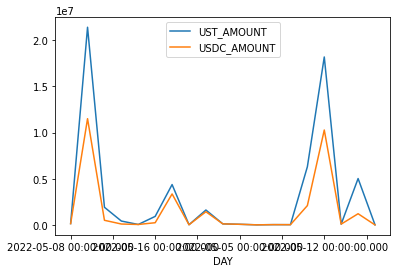

In [923]:
dp.get_ust_usdc().set_index('DAY')[['UST_AMOUNT','USDC_AMOUNT']].plot(kind='line')

## Depooling ------------------------------------------------------------

In [782]:
df = dp.get_unpool_whitelisted()
unpooling_users=df[df.ATTRIBUTE_KEY=='sender']
unpooling_users=unpooling_users.groupby('HOUR').ATTRIBUTE_VALUE.nunique().reset_index()
unpooling_users.columns = ['Time','Number of users depooling']

In [783]:
df[df.ATTRIBUTE_KEY=='sender'].ATTRIBUTE_VALUE.nunique()

2217

In [784]:
ChartProvider().depoolin_users(unpooling_users)

alt.Chart(...)

In [808]:
df = dp.get_unpool_whitelisted()
df = df[df.ATTRIBUTE_VALUE.str.contains('ibc')]
df['UST'] = df.ATTRIBUTE_VALUE.apply(lambda x:int(x.replace('ibc/BE1BB42D4BE3C30D50B68D7C41DB4DFCE9678E8EF8C539F6E6A9345048894FCC','')))
(df.UST/1000000).sum()

2827107.8888410004

In [809]:
df = dp.get_unpool_whitelisted()
df = df[(df.MSG_INDEX==1)&(df.ATTRIBUTE_VALUE.str.contains('uosmo'))]
df['OSMO'] = df.ATTRIBUTE_VALUE.apply(lambda x:int(x.replace('uosmo','')))
(df.OSMO/1000000).sum()

193.782246

In [863]:
df = dp.get_unpool_whitelisted()
df[df.TX_ID=='C9739773A770A140EE5CF30B0B6031BD05CE9C625083DB8A40FA11FC0BE9C892']

,BLOCK_ID,BLOCK_TIMESTAMP,BLOCKCHAIN,CHAIN_ID,TX_ID,MSG_INDEX,MSG_TYPE,ATTRIBUTE_INDEX,ATTRIBUTE_KEY,ATTRIBUTE_VALUE,DAY,HOUR
9486,4402456,2022-05-15 16:36:27.340,osmosis,osmosis-1,C9739773A770A140EE5CF30B0B6031BD05CE9C625083DB8A40FA11FC0BE9C892,1,coin_received,1,amount,75000uosmo,2022-05-15 00:00:00.000,2022-05-15 16:00:00.000
9593,4402456,2022-05-15 16:36:27.340,osmosis,osmosis-1,C9739773A770A140EE5CF30B0B6031BD05CE9C625083DB8A40FA11FC0BE9C892,2,transfer,1,sender,osmo1uyllp5t3jeexq20rcrsuta0w297alympvg7azv,2022-05-15 00:00:00.000,2022-05-15 16:00:00.000
9870,4402456,2022-05-15 16:36:27.340,osmosis,osmosis-1,C9739773A770A140EE5CF30B0B6031BD05CE9C625083DB8A40FA11FC0BE9C892,7,message,0,action,unpool_whitelisted_pool,2022-05-15 00:00:00.000,2022-05-15 16:00:00.000
10019,4402456,2022-05-15 16:36:27.340,osmosis,osmosis-1,C9739773A770A140EE5CF30B0B6031BD05CE9C625083DB8A40FA11FC0BE9C892,28,coin_received,1,amount,2086396884ibc/BE1BB42D4BE3C30D50B68D7C41DB4DFCE9678E8EF8C539F6E6A9345048894FCC,2022-05-15 00:00:00.000,2022-05-15 16:00:00.000


**WHERE WAS LOCKED AFTER DEPOOLING**

In [864]:
df = dp.get_unpool_whitelisted()
depool = df[df.ATTRIBUTE_KEY=='sender'][['ATTRIBUTE_VALUE','HOUR']]
df2 = dp.get_lock_lp()
lock = df2[df2.ATTRIBUTE_KEY=='owner'][['TX_ID','ATTRIBUTE_VALUE','HOUR']]

In [865]:
df = depool.merge(lock,on='ATTRIBUTE_VALUE',how='left')
depool_lock = df[(df.HOUR_y.isna())|(df.HOUR_x<=df.HOUR_y)]
lock_pool = df2[df2.ATTRIBUTE_KEY=='amount']
lock_pool['pool'] = lock_pool.ATTRIBUTE_VALUE.apply(lambda x: int(x.split('gamm/pool/')[1]))

<ipython-input-865-4e037b157974>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lock_pool['pool'] = lock_pool.ATTRIBUTE_VALUE.apply(lambda x: int(x.split('gamm/pool/')[1]))


In [897]:
df = depool_lock.merge(lock_pool, how='left', on='TX_ID')
df = df.fillna(-1).pool.value_counts(normalize=True).head(7).reset_index()
df.columns = ['pool_id','Number of users']
df['pool'] = df.pool_id.map(lambda x: str(int(x))).map(dp.pools)
df['Number of users'] = df['Number of users']*100
df

,pool_id,Number of users,pool
0,-1.0,73.978495,No LP
1,678.0,6.494624,USDC/OSMO
2,1.0,2.752688,OSMO/ATOM
3,674.0,2.709677,DAI/OSMO
4,704.0,2.494624,wETH/OSMO
5,601.0,1.462366,CMDX/OSMO
6,604.0,1.376344,STARS/OSMO


In [898]:
ChartProvider().depool_lock(df)

alt.LayerChart(...)

## -----------

## Exit and Enter LP ------------------------------------------------------------

In [742]:
exit = dp.get_exit_pool_sender()
lock = dp.get_lock_lp()
swap = dp.get_swaps_ust_sender()
df = dp.get_locks(exit,swap,lock)

<ipython-input-718-c639d2b1b1e0>:91: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lock_owner['SENDER'] = lock_owner.ATTRIBUTE_VALUE


In [743]:
x = df[df.type=='Exit'].groupby('pool').amount.count().reset_index().sort_values(by='amount', ascending=False).head()
x['pool_name'] = x.pool.map(dp.pools)
x.pool_name.unique()

array(['No LP', 'OSMO/ATOM', 'LUNA/UST', 'USDC/OSMO', 'HUAHUA/OSMO'],
      dtype=object)

In [744]:
y = df[df.type=='Swap'].groupby('pool').amount.count().reset_index().sort_values(by='amount', ascending=False).head()
y['pool_name'] = y.pool.map(dp.pools)
y

,pool,amount,pool_name
60,No LP,87515,No LP
58,704,1886,wETH/OSMO
16,562,1587,LUNA/OSMO
0,1,1087,OSMO/ATOM
15,561,1061,LUNA/UST


In [745]:
ChartProvider().lock_pool_pie(x, title='Exited UST/OSMO')

alt.Chart(...)

In [746]:
ChartProvider().lock_pool_pie(y,title='Swapped UST')

alt.Chart(...)

In [747]:
df = dp.get_lock_pool_usdc()
df = df[df.ATTRIBUTE_KEY=='amount']
df['GAMMA_TOKENS'] = df.ATTRIBUTE_VALUE.apply(lambda x: int(x.replace('gamm/pool/678',''))/1000000000000000000)
df['DAY'] = df.BLOCK_TIMESTAMP.apply(lambda x: str(x)[:11]+'00:00:00.000')
df = df.groupby('DAY').GAMMA_TOKENS.sum().reset_index()
df['POOL'] = 'Entered USDC/OSMO'
df = df.append(dp.get_exit_gamma())

In [748]:
ChartProvider().exit_enter(df)

alt.LayerChart(...)

In [749]:
lock_usdc_sender = dp.get_lock_usdc_sender()
exit_ust_sender = set(dp.get_exit_pool_sender().SENDER.values)
len(lock_usdc_sender.intersection(exit_ust_sender))
exit_ust_usdc = len(lock_usdc_sender.intersection(exit_ust_sender))
df = pd.DataFrame([[exit_ust_usdc,'Entered USDC/OSMO'],
                  [len(exit_ust_sender)-exit_ust_usdc,'Exited UST/OSMO']], columns=['Number of users','Type'])
df

,Number of users,Type
0,74,Entered USDC/OSMO
1,5253,Exited UST/OSMO


In [750]:
df = pd.DataFrame([[exit_ust_usdc,'Exited UST/OSMO'],
                  [len(lock_usdc_sender)-exit_ust_usdc,'Others']], columns=['Number of users','Type'])
df

,Number of users,Type
0,74,Exited UST/OSMO
1,109,Others


In [751]:
ChartProvider().users_pie(df)

alt.Chart(...)

## Swap Tokens ------------------------------------------------------------

In [752]:
ChartProvider().chart(dp.get_ust_osmo(),'UST','#25a69a')

alt.LayerChart(...)

In [908]:
df = dp.get_usdc_out().append(dp.get_ust_osmo()).append(dp.get_dai_osmo())
assets = ['USDC','UST','DAI']
colors = ['#25a69a','#fbc02c','#ffffff']
cols = ['DAY','AMOUNT','TOKEN']
ChartProvider().assets_chart(df, assets, colors)

alt.LayerChart(...)

In [180]:
dp.get_exit_pool()

,DAY,UST,OSMO
0,2022-05-08 00:00:00.000,1.628882e+06,4.685184e+05
1,2022-05-10 00:00:00.000,2.104553e+06,6.428116e+05
2,2022-05-02 00:00:00.000,1.110920e+06,2.940560e+05
3,2022-05-05 00:00:00.000,1.009931e+06,2.532852e+05
4,2022-04-30 00:00:00.000,7.650771e+04,1.963852e+04
5,2022-05-07 00:00:00.000,1.605108e+06,4.395868e+05
6,2022-05-14 00:00:00.000,5.650636e+04,1.048679e+04
7,2022-05-03 00:00:00.000,2.257817e+06,5.842282e+05
8,2022-05-09 00:00:00.000,2.124181e+06,6.576357e+05
9,2022-05-01 00:00:00.000,3.977875e+06,1.022606e+06


In [253]:
df = dp.get_exit_pool()
cols = df.columns
alt.Chart(dp.get_exit_pool()).mark_bar(point=True).encode(
    x=alt.X(cols[0]+':T', sort=alt.EncodingSortField(order='ascending')),
    y=cols[1]+":Q",
    tooltip=[alt.Tooltip(cols[0]+':T', format='%Y-%m-%d %H:%M'), alt.Tooltip(cols[1]+":Q")]
).properties(width=700).configure_axisX(
).configure_view(strokeOpacity=0)

alt.Chart(...)

In [127]:
#fbc02c - yellow
#ef5350 - red
#25a69a - green
#2d2755 - dark purple

In [124]:
df = claim(n_users)
df.head()

,DAY,POOL_ID,N_USERS
0,2022-05-13 00:00:00.000,560,3654
1,2022-05-09 00:00:00.000,560,6417
2,2022-05-14 00:00:00.000,674,29
3,2022-04-30 00:00:00.000,678,9
4,2022-05-02 00:00:00.000,560,5228


In [43]:
cols = df.columns
alt.Chart(df).mark_line(point=True).encode(
    x=alt.X(cols[0]+':T', sort=alt.EncodingSortField(order='ascending')),
    y=cols[2]+":Q",
    color=alt.Color(cols[1], 
                    scale=alt.Scale(domain=[560,678,674], range=['white','red','blue'])
          ),
    tooltip=[alt.Tooltip(cols[0]+':T', format='%Y-%m-%d %H:%M'), alt.Tooltip(cols[2]+":Q")]
).properties(width=700).configure_axisX(
).configure_view(strokeOpacity=0)

alt.Chart(...)